# Import Library

In [1]:
!pip install pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import CSV File

In [2]:
#File Import from drive

from google.colab import drive
drive.mount('/content/drive')
Fiber="/content/drive/MyDrive/ML Research/ML Fiber Flexure/Fiber Flexural Strength.xlsx"
df=pd.read_excel(Fiber)
df.head(10)

Mounted at /content/drive


,W/C \nRatio,Amount of Coarse \nAggregate \n,Amount of Fine \nAggregate\n,Admixture provided,% of Fiber,Fiber Type,Aspect Ratio (l/d),Fiber tensile strength,Flexural Strength (Mpa)
0,0.36,1.497717,2.367580,1,0.0,0,0.0,0.0,5.94
1,0.36,1.486301,2.349315,1,0.5,3,45.0,1250.0,6.14
2,0.36,1.474886,2.331050,1,1.0,3,45.0,1250.0,6.32
3,0.36,1.463470,2.317352,1,1.5,3,45.0,1250.0,7.75
4,0.36,1.486301,2.349315,1,0.5,3,65.0,1000.0,6.24
5,0.36,1.474886,2.331050,1,1.0,3,65.0,1000.0,8.08
6,0.36,1.463470,2.317352,1,1.5,3,65.0,1000.0,9.33
7,0.36,1.486301,2.349315,1,0.5,3,80.0,1200.0,6.42
8,0.36,1.474886,2.331050,1,1.0,3,80.0,1200.0,9.74
9,0.36,1.463470,2.317352,1,1.5,3,80.0,1200.0,10.76


# Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Specify the columns to be one-hot encoded
columns_to_encode = [5]

# Create a ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')

# Fit and transform the DataFrame
df1 = ct.fit_transform(df)

# Manually set new column names
new_column_names = ['No Fiber', 'Graphite Fiber', 'Hybrid Fiber', 'Metallic Fiber', 'Mineral Fiber', 'Organic Fiber', 'Synthetic Fiber', 'W/C', 'CA/C', 'FA/C', 'Admixture\nUtilization', '% of Fiber', 'Fiber Aspect\nRatio (l/d)', 'Fiber Tensile\nStrength (MPa)', 'Compressive Strength (MPa)']

# Convert the result to a DataFrame with manual column names
df1 = pd.DataFrame(df1, columns=new_column_names)

# Display the resulting DataFrame
df1.head()

,No Fiber,Graphite Fiber,Hybrid Fiber,Metallic Fiber,Mineral Fiber,Organic Fiber,Synthetic Fiber,W/C,CA/C,FA/C,Admixture\nUtlization,% of Fiber,Fiber Aspect\nRatio (l/d),Fiber Tensile\nStrength (MPa),Compressive Strength (MPa)
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,1.5,2.4,0.0,0.0,0.0,0.0,49.1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.4,1.5,2.3,0.0,0.5,45.0,1250.0,50.8
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.4,1.5,2.3,0.0,1.0,45.0,1250.0,53.7
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.4,1.5,2.3,0.0,1.5,45.0,1250.0,57.7
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.4,1.5,2.3,0.0,0.5,65.0,1000.0,53.5


In [10]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
#x_columns = df1.columns[:-1]  # Get column names excluding the last one
#x = pd.DataFrame(x, columns=x_columns)
#y = pd.DataFrame(y)
#print(x.head())
#print(y.head())

# Data Split: X Y

# Test_Train Split

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [12]:
print(x_test.shape, y_test.shape)

(121, 8) (121,)


# XGB_Feature_Importance

In [13]:
!pip install xgboost --upgrade

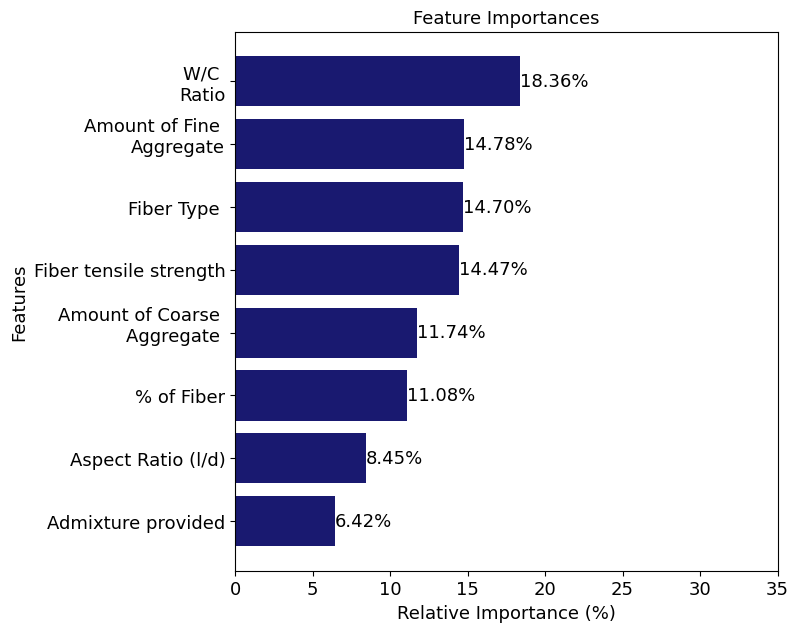

In [15]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Assuming x_train, y_train, x_test, and y_test are defined
lr1 = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, subsample=0.5,
                       colsample_bytree=0.5, max_depth=4, min_child_weight=2)
lr1.fit(x_train, y_train)

# Get feature importances
importances = lr1.feature_importances_

# Normalize importances to percentage
total_importance = np.sum(importances)
importances_percentage = (importances / total_importance) * 100
# Get feature names from the original DataFrame (df)
features = list(df.columns[:-1])  # Exclude the target column

# Sort features based on importances
indices = np.argsort(importances_percentage)

# Choose a different color (e.g., 'midnightblue') for the bars
bar_color = 'midnightblue'

# Plot the feature importances with the specified color
plt.figure(figsize=(7, 7))
bars = plt.barh(range(1, len(indices)+1), importances_percentage[indices], color=bar_color, align='center')
plt.yticks(range(1, len(indices)+1), [features[i] for i in indices])

# Annotate each bar with its corresponding importance value
for bar, importance in zip(bars, importances_percentage[indices]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance:.2f}%',
             va='center', ha='left', color='black', fontname='Times New Roman', fontsize=13)
plt.xlim(0, 35)

# Customize xlabel and ylabel
plt.xlabel('Relative Importance (%)', color='black', fontname='Times New Roman', fontsize=13)
plt.ylabel('Features', color='black', fontname='Times New Roman', fontsize=13)

# Customize tick parameters
plt.tick_params(axis='both', labelsize=13, colors='black')
plt.xticks(fontname='Times New Roman')  # Set font family for x tick labels
plt.yticks(fontname='Times New Roman')  # Set font family for y tick labels

plt.title('Feature Importances', color='black', fontname='Times New Roman', fontsize=13)

plt.show()


# LightGBM_Feature_Importance

[LightGBM] [Warning] num_leaves is set=31, num_leaf=13 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, num_leaf=13 will be ignored. Current value: num_leaves=31
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 181, number of used features: 8
[LightGBM] [Info] Start training from score 6.482563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

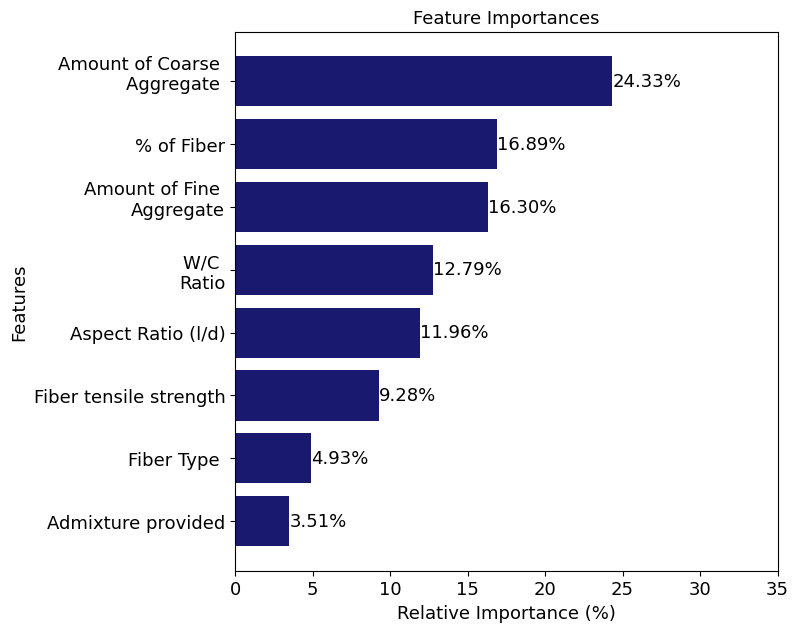

In [17]:
from lightgbm import LGBMRegressor

# Assuming x_train, y_train, x_test, and y_test are defined
lr1 = LGBMRegressor(n_estimators=200, max_depth=8, colsample_bytree=0.8,
                              learning_rate=0.15, subsample=0.1, num_leaf=13)

y_train_1d = np.ravel(y_train)
y_test_1d = np.ravel(y_test)

# Get feature names from the original DataFrame (df)
features = list(df.columns[:-1])  # Exclude the target column

# Pass feature names to the fit method
lr1.fit(x_train, y_train_1d)

# Get feature importances
importances = lr1.feature_importances_

# Normalize importances to percentage
total_importance = np.sum(importances)
importances_percentage = (importances / total_importance) * 100


# Sort features based on importances
indices = np.argsort(importances_percentage)

# Choose a different color (e.g., 'midnightblue') for the bars
bar_color = 'midnightblue'

# Plot the feature importances with the specified color
plt.figure(figsize=(7, 7))
bars = plt.barh(range(1, len(indices)+1), importances_percentage[indices], color=bar_color, align='center')
plt.yticks(range(1, len(indices)+1), [features[i] for i in indices])

# Annotate each bar with its corresponding importance value
for bar, importance in zip(bars, importances_percentage[indices]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance:.2f}%',
             va='center', ha='left', color='black', fontname='Times New Roman', fontsize=13)
plt.xlim(0, 35)

# Customize xlabel and ylabel
plt.xlabel('Relative Importance (%)', color='black', fontname='Times New Roman', fontsize=13)
plt.ylabel('Features', color='black', fontname='Times New Roman', fontsize=13)

# Customize tick parameters
plt.tick_params(axis='both', labelsize=13, colors='black')
plt.xticks(fontname='Times New Roman')  # Set font family for x tick labels
plt.yticks(fontname='Times New Roman')  # Set font family for y tick labels

plt.title('Feature Importances', color='black', fontname='Times New Roman', fontsize=13)

plt.show()